<a href="https://colab.research.google.com/github/nurulapriliaaa/F55122010_Nurul-Aprilia-QuisPCD/blob/main/F55122010_Nurul_Aprilia_Quis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
import random


In [90]:
# 1. Baca gambar menggunakan OpenCV
image_path = "/content/f6abd377-0bc2-4951-9a3d-216daa114cbd.jpeg"
image_cv = cv2.imread(image_path)

In [91]:
# 2. Edge detection menggunakan Sobel
sobel_x = cv2.Sobel(image_cv, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image_cv, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Edge detection menggunakan Canny
canny_edges = cv2.Canny(image_cv, 100, 200)



In [92]:
# 3. Random cropping
def random_crop(image, crop_height, crop_width):
    height, width = image.shape[:2]
    start_x = random.randint(0, width - crop_width)
    start_y = random.randint(0, height - crop_height)
    return image[start_y:start_y + crop_height, start_x:start_x + crop_width]

# Half-size center cropping
def center_crop(image):
    height, width = image.shape[:2]
    start_x = (width - min(width, height)) // 2
    start_y = (height - min(width, height)) // 2
    end_x = start_x + min(width, height)
    end_y = start_y + min(width, height)
    return image[start_y:end_y, start_x:end_x]


In [93]:
# 4. Transformasi gambar: putih jadi hitam, hitam jadi putih
def inverse_color(image):
    return cv2.bitwise_not(image)

In [94]:
# 5. Tambahkan noise pada gambar original
def add_salt_pepper_noise(image, salt_pepper_ratio=0.05):
    noisy_image = np.copy(image)
    num_salt = np.ceil(salt_pepper_ratio * image.size * 0.5)
    salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    num_pepper = np.ceil(salt_pepper_ratio * image.size * 0.5)
    pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    return noisy_image

def add_gaussian_noise(image, mean=0, sigma=15):
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + gauss, 0, 255)
    return noisy_image.astype(np.uint8)



In [95]:
# 6. Transformasi geometri
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

def flip_horizontal(image):
    return cv2.flip(image, 1)

def flip_vertical(image):
    return cv2.flip(image, 0)



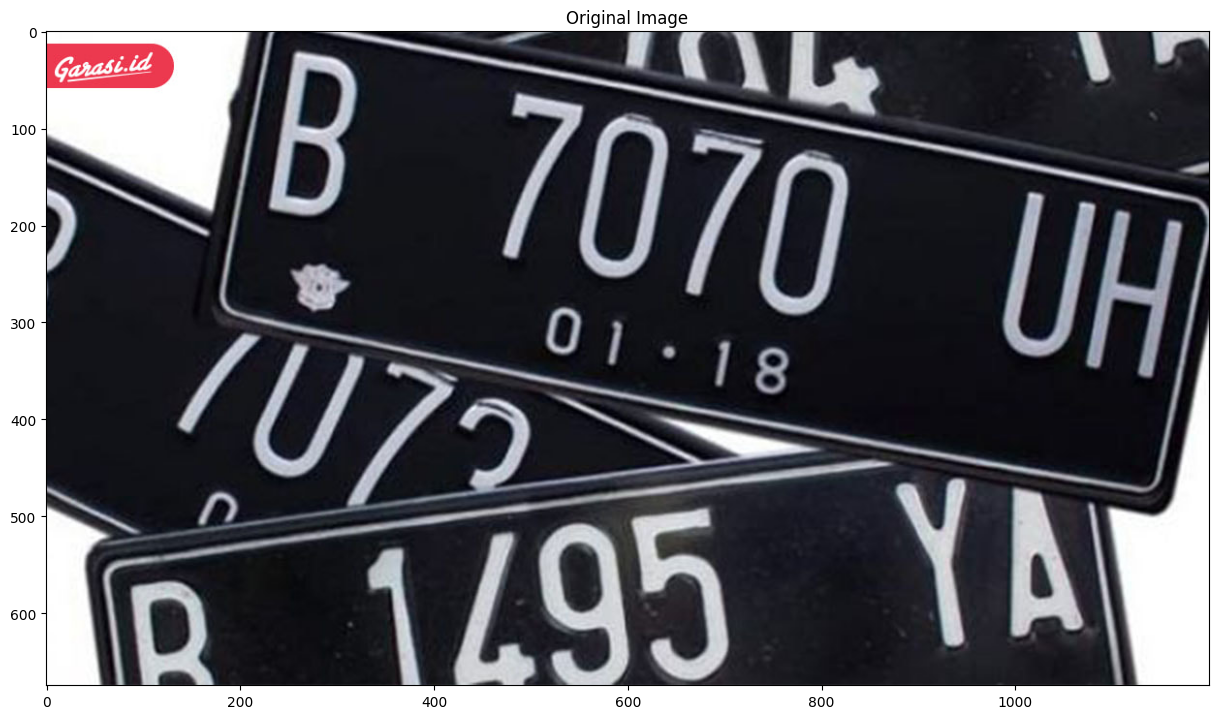

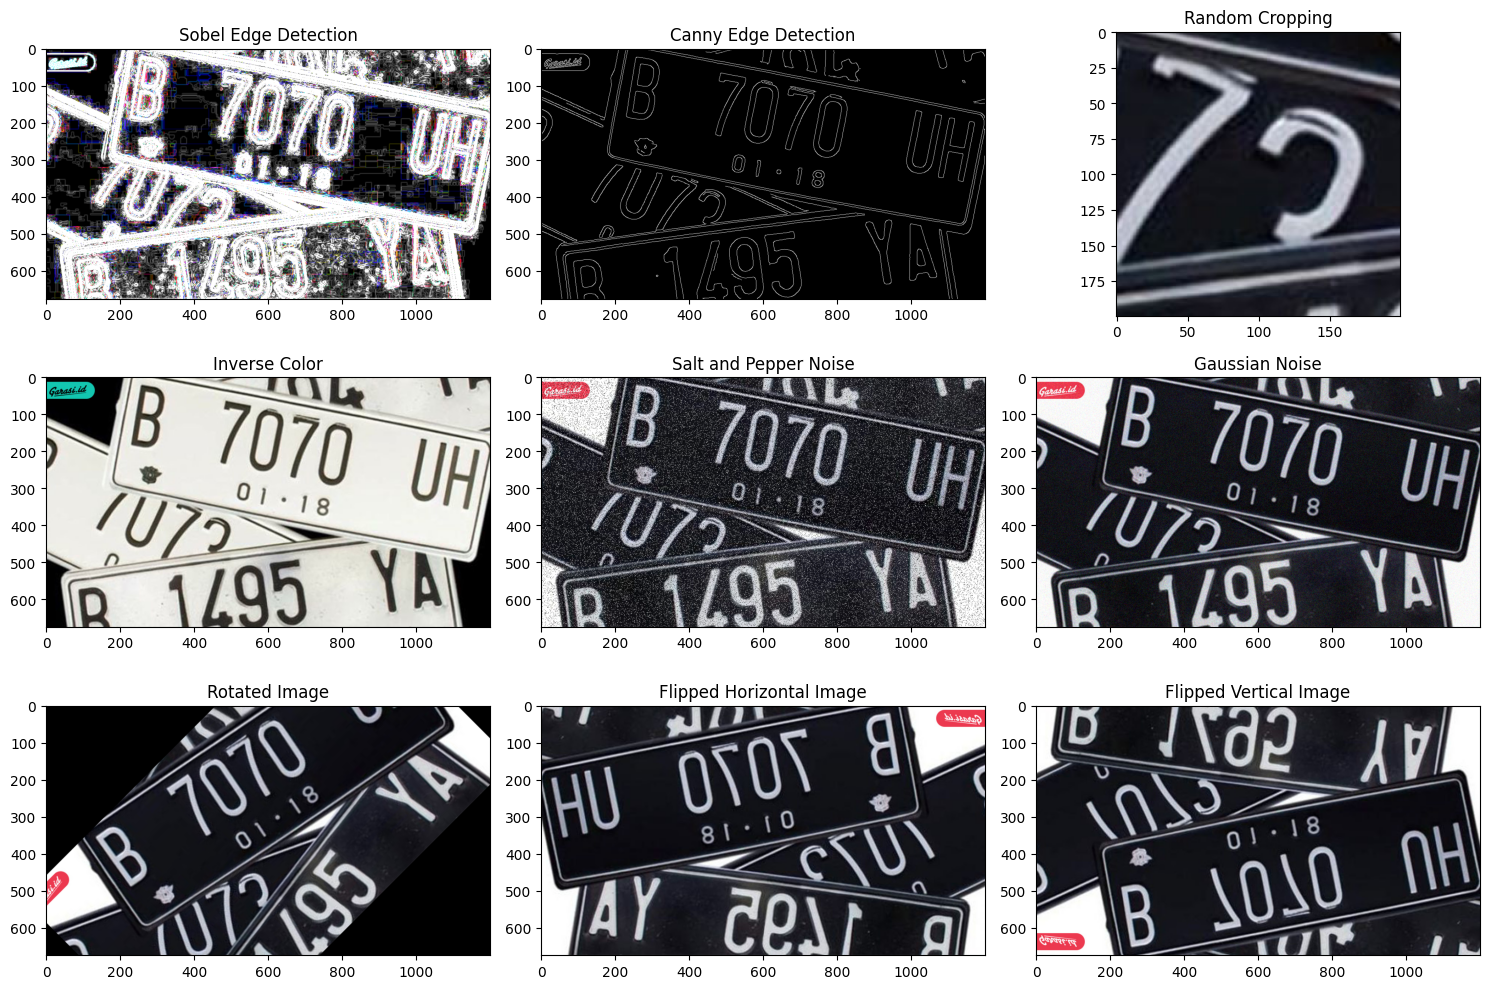

In [114]:
# Menampilkan gambar original di luar subplot
plt.figure(figsize=(15, 10))

# Original Image di luar subplot
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# Menampilkan gambar dalam subplot
plt.figure(figsize=(15, 10))

# Sobel Edge Detection
sobel_combined_uint8 = cv2.convertScaleAbs(sobel_combined)
plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(sobel_combined_uint8, cv2.COLOR_BGR2RGB))
plt.title("Sobel Edge Detection")

# Canny Edge Detection
plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(canny_edges, cv2.COLOR_BGR2RGB))
plt.title("Canny Edge Detection")

# Random Cropping
plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(random_crop(image_cv, 200, 200), cv2.COLOR_BGR2RGB))
plt.title("Random Cropping")

# Inverse Color
plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(inverse_color(image_cv), cv2.COLOR_BGR2RGB))
plt.title("Inverse Color")

# Salt and Pepper Noise
plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(add_salt_pepper_noise(image_cv), cv2.COLOR_BGR2RGB))
plt.title("Salt and Pepper Noise")

# Gaussian Noise
plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(add_gaussian_noise(image_cv), cv2.COLOR_BGR2RGB))
plt.title("Gaussian Noise")

# Rotated Image
plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(rotate_image(image_cv, 45), cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")

# Flip Horizontal Image
plt.subplot(3, 3, 8)
plt.imshow(cv2.cvtColor(flip_horizontal(image_cv), cv2.COLOR_BGR2RGB))
plt.title("Flipped Horizontal Image")

# Flip Vertikal Image
plt.subplot(3, 3, 9)
plt.imshow(cv2.cvtColor(flip_vertical(image_cv), cv2.COLOR_BGR2RGB))
plt.title("Flipped Vertical Image")

plt.tight_layout()
plt.show()